In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
dataset_path = "./"
img_size = (128, 128)
batch_size = 32


In [2]:

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [3]:

# Build ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save model
model.save("cat_dog_classifier.h5")


C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\umesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 487ms/step - accuracy: 0.4602 - loss: 9.7205 - val_accuracy: 0.5000 - val_loss: 8.6793
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.4981 - loss: 5.3734 - val_accuracy: 0.5400 - val_loss: 1.5287
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4991 - loss: 1.3269 - val_accuracy: 0.5500 - val_loss: 1.0155
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.5493 - loss: 0.8630 - val_accuracy: 0.5600 - val_loss: 0.8491
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6070 - loss: 0.8203 - val_accuracy: 0.5500 - val_loss: 1.0542
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.6446 - loss: 0.6816 - val_accuracy: 0.5200 - val_loss: 1.2772
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.6914 - loss: 0.6782 - val_accuracy: 0.5300 - val_loss: 0.8085
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.7416 - loss: 0.4970 - val_accuracy: 0.

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
model = load_model("cat_dog_classifier.h5")

In [ ]:
img_path = "322.jpg"  
img = image.load_img(img_path, target_size=(128, 128))

In [10]:
import matplotlib.pyplot as plt

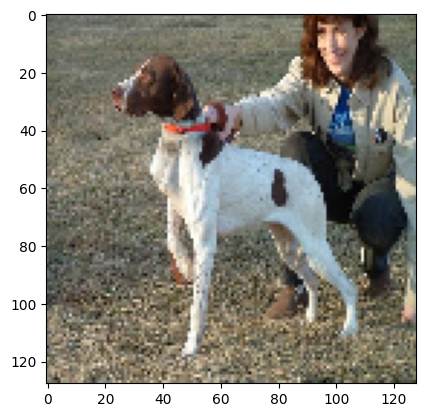

In [11]:
plt.imshow(img)

In [ ]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.0  

In [ ]:

prediction = model.predict(img_array)


if prediction[0][0] > 0.5:
    print("It's a Dog! 🐶")
else:
    print("It's a Cat! 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
It's a Dog! 🐶
